In [353]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [354]:
# importing data

data = pd.read_csv('daily-temperatures.csv')

print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]

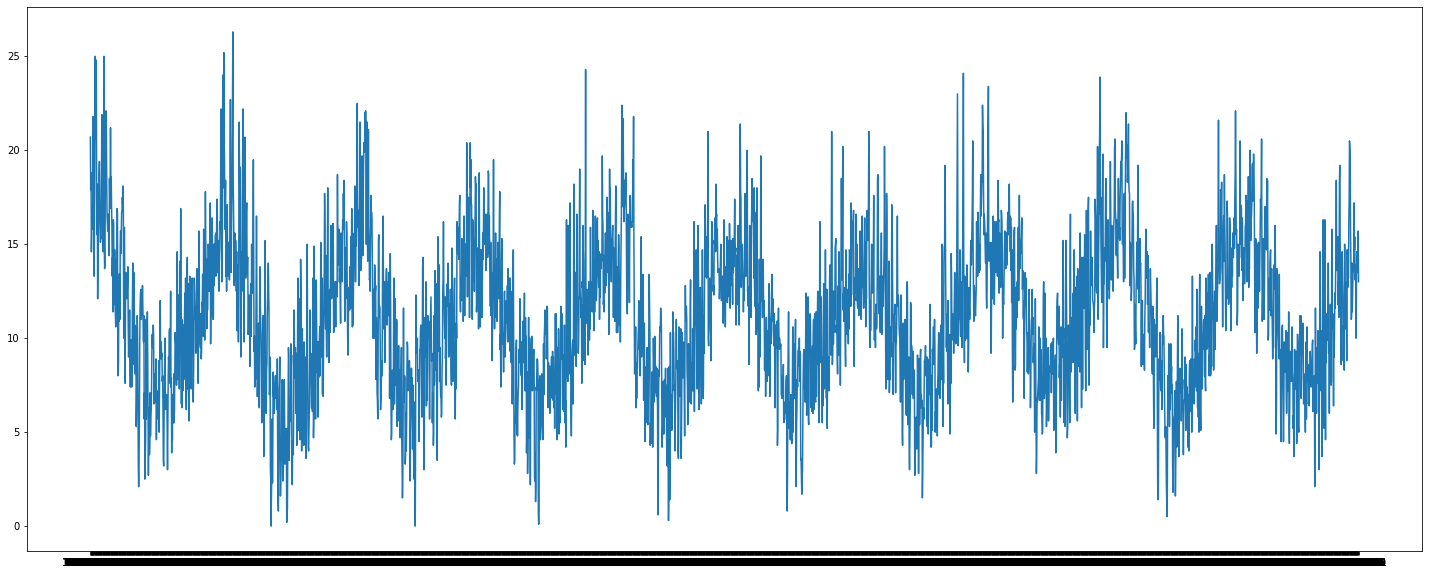

In [355]:
# visualization of temperature across the whole dataset

plt.figure(figsize=(25,10))
plt.plot(data['Date'], data['Temp'])

In [356]:
# converting 'Date' column to datetime

data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [357]:
# creating year column

data['Year'] = data['Date'].dt.year

# creating month column

data['Month'] = data['Date'].dt.month

# creating day of month column

data['Day'] = data['Date'].dt.day

data

Date  Temp  Year  Month  Day
0    1981-01-01  20.7  1981      1    1
1    1981-01-02  17.9  1981      1    2
2    1981-01-03  18.8  1981      1    3
3    1981-01-04  14.6  1981      1    4
4    1981-01-05  15.8  1981      1    5
...         ...   ...   ...    ...  ...
3645 1990-12-27  14.0  1990     12   27
3646 1990-12-28  13.6  1990     12   28
3647 1990-12-29  13.5  1990     12   29
3648 1990-12-30  15.7  1990     12   30
3649 1990-12-31  13.0  1990     12   31

[3650 rows x 5 columns]

In [358]:
# lag feature for the temperature of the day before

data['lag1'] = data['Temp'].shift(1).fillna(0)

# lag feature for the temperature of two day before

data['lag2'] = data['Temp'].shift(2).fillna(0)

data

Date  Temp  Year  Month  Day  lag1  lag2
0    1981-01-01  20.7  1981      1    1   0.0   0.0
1    1981-01-02  17.9  1981      1    2  20.7   0.0
2    1981-01-03  18.8  1981      1    3  17.9  20.7
3    1981-01-04  14.6  1981      1    4  18.8  17.9
4    1981-01-05  15.8  1981      1    5  14.6  18.8
...         ...   ...   ...    ...  ...   ...   ...
3645 1990-12-27  14.0  1990     12   27  14.6  12.9
3646 1990-12-28  13.6  1990     12   28  14.0  14.6
3647 1990-12-29  13.5  1990     12   29  13.6  14.0
3648 1990-12-30  15.7  1990     12   30  13.5  13.6
3649 1990-12-31  13.0  1990     12   31  15.7  13.5

[3650 rows x 7 columns]

In [359]:
# rolling windows statistic: mean of the 3, 5, 7, 9 previous day

for i in [3, 5, 7, 9, 15]:
    data[f'{i}day_mean'] = data['Temp'].rolling(i).mean().round(1).fillna(0)


# min of the 7 previous day

data['7day_min'] = data['Temp'].rolling(7).min().fillna(0)

# max of the 7 previous day

data['7day_max'] = data['Temp'].rolling(7).max().fillna(0)

data.head(10)

Date  Temp  Year  Month  Day  lag1  lag2  3day_mean  5day_mean  \
0 1981-01-01  20.7  1981      1    1   0.0   0.0        0.0        0.0   
1 1981-01-02  17.9  1981      1    2  20.7   0.0        0.0        0.0   
2 1981-01-03  18.8  1981      1    3  17.9  20.7       19.1        0.0   
3 1981-01-04  14.6  1981      1    4  18.8  17.9       17.1        0.0   
4 1981-01-05  15.8  1981      1    5  14.6  18.8       16.4       17.6   
5 1981-01-06  15.8  1981      1    6  15.8  14.6       15.4       16.6   
6 1981-01-07  15.8  1981      1    7  15.8  15.8       15.8       16.2   
7 1981-01-08  17.4  1981      1    8  15.8  15.8       16.3       15.9   
8 1981-01-09  21.8  1981      1    9  17.4  15.8       18.3       17.3   
9 1981-01-10  20.0  1981      1   10  21.8  17.4       19.7       18.2   

   7day_mean  9day_mean  15day_mean  7day_min  7day_max  
0        0.0        0.0         0.0       0.0       0.0  
1        0.0        0.0         0.0       0.0       0.0  
2        0.0        0.0         0.0       0.0       0.0  
3        0.0        0.0         0.0       0.0       0.0  
4        0.0        0.0         0.0       0.0       0.0  
5        0.0        0.0         0.0       0.0       0.0  
6       17.1        0.0         0.0      14.6      20.7  
7       16.6        0.0         0.0      14.6      18.8  
8       17.1       17.6         0.0      14.6      21.8  
9       17.3       17.5         0.0      14.6      21.8

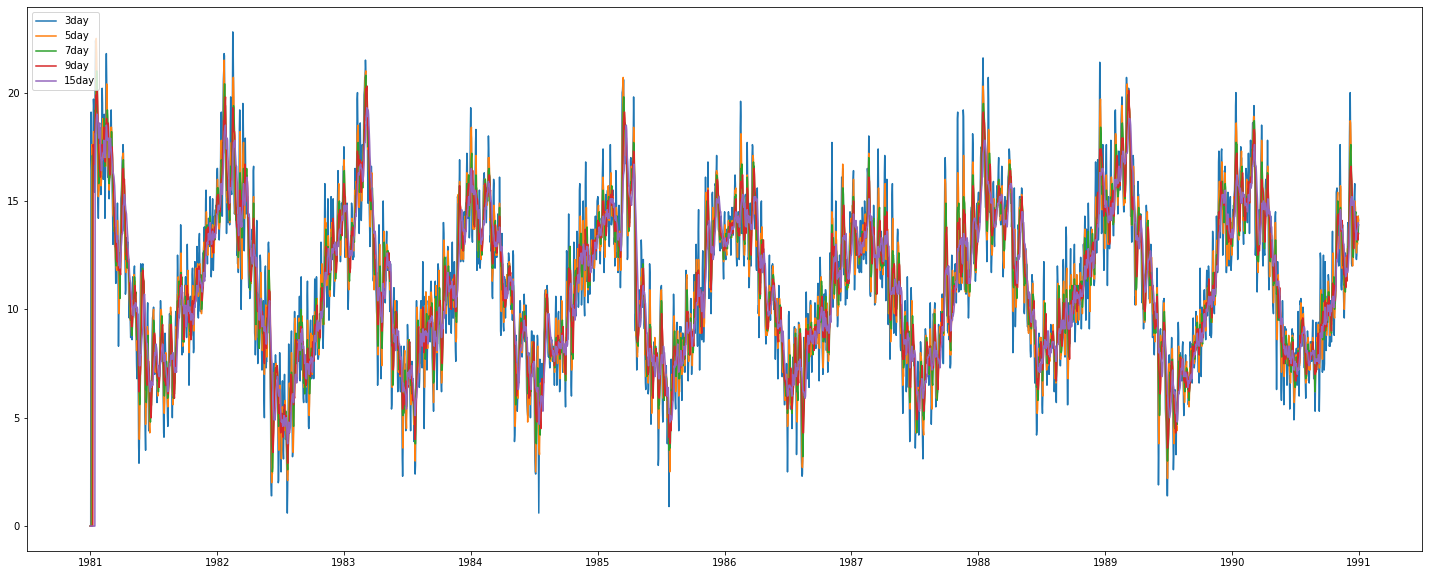

In [360]:
plt.figure(figsize=(25,10))
plt.plot(data['Date'], data['3day_mean'], label='3day')
plt.plot(data['Date'], data['5day_mean'], label='5day')
plt.plot(data['Date'], data['7day_mean'], label='7day')
plt.plot(data['Date'], data['9day_mean'], label='9day')
plt.plot(data['Date'], data['15day_mean'], label='15day')
plt.legend(loc=2)

In [361]:
# define everything before 1990 as train

train = data.loc[data['Year'] != 1990]
train

Date  Temp  Year  Month  Day  lag1  lag2  3day_mean  5day_mean  \
0    1981-01-01  20.7  1981      1    1   0.0   0.0        0.0        0.0   
1    1981-01-02  17.9  1981      1    2  20.7   0.0        0.0        0.0   
2    1981-01-03  18.8  1981      1    3  17.9  20.7       19.1        0.0   
3    1981-01-04  14.6  1981      1    4  18.8  17.9       17.1        0.0   
4    1981-01-05  15.8  1981      1    5  14.6  18.8       16.4       17.6   
...         ...   ...   ...    ...  ...   ...   ...        ...        ...   
3280 1989-12-27  13.3  1989     12   27  16.0  16.4       15.2       14.1   
3281 1989-12-28  11.7  1989     12   28  13.3  16.0       13.7       14.0   
3282 1989-12-29  10.4  1989     12   29  11.7  13.3       11.8       13.6   
3283 1989-12-30  14.4  1989     12   30  10.4  11.7       12.2       13.2   
3284 1989-12-31  12.7  1989     12   31  14.4  10.4       12.5       12.5   

      7day_mean  9day_mean  15day_mean  7day_min  7day_max  
0           0.0        0.0         0.0       0.0       0.0  
1           0.0        0.0         0.0       0.0       0.0  
2           0.0        0.0         0.0       0.0       0.0  
3           0.0        0.0         0.0       0.0       0.0  
4           0.0        0.0         0.0       0.0       0.0  
...         ...        ...         ...       ...       ...  
3280       13.5       13.7        13.4      11.8      16.4  
3281       13.4       13.2        13.3      11.7      16.4  
3282       13.2       13.0        13.3      10.4      16.4  
3283       13.6       13.2        13.5      10.4      16.4  
3284       13.6       13.3        13.5      10.4      16.4  

[3285 rows x 14 columns]

In [362]:
# define year 1990 as validation

validation = data.loc[data['Year'] == 1990]
target = validation['Temp']
target

3285    14.8
3286    13.3
3287    15.6
3288    14.5
3289    14.3
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 365, dtype: float64

In [363]:
# baseline with previous year

prv_year = data.loc[data['Year'] == 1989]
prv_year_prediction = data.loc[data['Year'] == 1989]['Temp']

baseline_prv_year = mean_squared_error(prv_year_prediction, target, squared=False)

print(f'RMSE for the previous year: {baseline_prv_year}')

RMSE for the previous year: 3.650760851455563


In [364]:
# baseline with average for month of the previous year

avg_prv_year = prv_year.groupby(['Month'])['Temp'].mean().round(1).reset_index()

avg_prv_year = prv_year.merge(avg_prv_year, on='Month')

avg_prv_year_prediction = avg_prv_year['Temp_y']

baseline_avg_prv_year = mean_squared_error(avg_prv_year_prediction, target, squared=False)
print(f'RMSE for monthly average temperature of the previous year: {baseline_avg_prv_year}')

RMSE for monthly average temperature of the previous year: 2.7033363455663957


In [365]:
# baseline with smoothed means of the previous year

for i in ['3day_mean', '5day_mean', '7day_mean', '9day_mean', '15day_mean']:

    baseline_smoothed = mean_squared_error(prv_year[i], target, squared=False)
    
    print(f'RMSE for {i}: {baseline_smoothed}')

RMSE for 3day_mean: 3.243632328876303
RMSE for 5day_mean: 3.068724245211792
RMSE for 7day_mean: 2.9661699856147226
RMSE for 9day_mean: 2.9128106278000048
RMSE for 15day_mean: 2.8608744711584304


In [366]:
# baseline with average of all the previous year

avg_historic = train.groupby(['Month', 'Day'])['Temp'].mean().round(1).reset_index()

# since we have some leap years, we need to drop 29th february

avg_historic.drop(avg_historic.loc[(avg_historic['Month'] == 2) & (avg_historic['Day'] == 29)].index, axis=0, inplace=True)

avg_historic_prediction = avg_historic['Temp']

baseline_avg_historic = mean_squared_error(avg_historic_prediction, target, squared=False)

print(f'RMSE for average of all the previous year: {baseline_avg_historic}')

RMSE for average of all the previous year: 2.714239468140377


# ML

In [367]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

X_train = train.drop(['Temp', 'Date'], axis=1)
y_train = train['Temp']

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [369]:
X_val = validation.drop(['Temp', 'Date'], axis=1)
y_pred = rfr.predict(X_val)
mean_squared_error(y_pred, target, squared=False)

0.670071149360633

In [336]:
# tryinig to create lag features from the previous years to avoid data leaks

df = pd.read_csv('daily-temperatures.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['temp_1yrb'] = df['Temp'].shift(365)
df['week_mean_1yrb'] = df['temp_1yrb'].rolling(7).mean().round(1).fillna(0)
df['15day_mean_1yrb'] = df['temp_1yrb'].rolling(15).mean().round(1).fillna(0)
df['month_mean_1yrb'] = df['temp_1yrb'].rolling(30).mean().round(1).fillna(0)
df['week_min_1yrb'] = df['temp_1yrb'].rolling(7).min().fillna(0)
df['week_max_1yrb'] = df['temp_1yrb'].rolling(7).max().fillna(0)
df['15day_min_1yrb'] = df['temp_1yrb'].rolling(15).min().fillna(0)
df['15day_max_1yrb'] = df['temp_1yrb'].rolling(15).max().fillna(0)
df['month_min_1yrb'] = df['temp_1yrb'].rolling(30).min().fillna(0)
df['month_max_1yrb'] = df['temp_1yrb'].rolling(30).max().fillna(0)
df

Date  Temp  Year  Month  Day  temp_1yrb  week_mean_1yrb  \
0    1981-01-01  20.7  1981      1    1        NaN             0.0   
1    1981-01-02  17.9  1981      1    2        NaN             0.0   
2    1981-01-03  18.8  1981      1    3        NaN             0.0   
3    1981-01-04  14.6  1981      1    4        NaN             0.0   
4    1981-01-05  15.8  1981      1    5        NaN             0.0   
...         ...   ...   ...    ...  ...        ...             ...   
3645 1990-12-27  14.0  1990     12   27       13.3            13.5   
3646 1990-12-28  13.6  1990     12   28       11.7            13.4   
3647 1990-12-29  13.5  1990     12   29       10.4            13.2   
3648 1990-12-30  15.7  1990     12   30       14.4            13.6   
3649 1990-12-31  13.0  1990     12   31       12.7            13.6   

      15day_mean_1yrb  month_mean_1yrb  week_min_1yrb  week_max_1yrb  \
0                 0.0              0.0            0.0            0.0   
1                 0.0              0.0            0.0            0.0   
2                 0.0              0.0            0.0            0.0   
3                 0.0              0.0            0.0            0.0   
4                 0.0              0.0            0.0            0.0   
...               ...              ...            ...            ...   
3645             13.4             14.4           11.8           16.4   
3646             13.3             14.4           11.7           16.4   
3647             13.3             14.1           10.4           16.4   
3648             13.5             14.0           10.4           16.4   
3649             13.5             13.9           10.4           16.4   

      15day_min_1yrb  15day_max_1yrb  month_min_1yrb  month_max_1yrb  
0                0.0             0.0             0.0             0.0  
1                0.0             0.0             0.0             0.0  
2                0.0             0.0             0.0             0.0  
3                0.0             0.0             0.0             0.0  
4                0.0             0.0             0.0             0.0  
...              ...             ...             ...             ...  
3645            10.4            17.3            10.4            18.7  
3646            10.4            17.3            10.4            18.7  
3647            10.4            17.3            10.4            18.7  
3648            10.4            17.3            10.4            18.7  
3649            10.4            17.3            10.4            18.7  

[3650 rows x 15 columns]

In [337]:
df.dropna(inplace=True)
df_val = df.loc[df['Year'] == 1990].drop(['Temp', 'Date'], axis=1)
df_target = df.loc[df['Year'] == 1990]['Temp']
df_train = df.loc[df['Year'] != 1990].drop(['Temp', 'Date'], axis=1)
df_y = df.loc[df['Year'] != 1990]['Temp']

In [338]:
rfr.fit(df_train, df_y)

RandomForestRegressor()

In [339]:
df_prediction = rfr.predict(df_val)
mean_squared_error(df_prediction, df_target, squared=False)

2.680116097976007

In [344]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(df_train, df_y)
gbr_pred = gbr.predict(df_val)
mean_squared_error(gbr_pred, df_target, squared=False)

2.675842910718125

In [347]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(df_train, df_y)
abr_pred = abr.predict(df_val)
mean_squared_error(abr_pred, df_target, squared=False)

2.6674723763603736

In [349]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()
br.fit(df_train, df_y)
br_pred = br.predict(df_val)
mean_squared_error(br_pred, df_target, squared=False)

2.884652492069019